# Evaluation Project - 9:Customer Churn Analysis





Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

OBJECTIVE:To build customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Target Varibale is churn which is given in binary form so this will be a classification problem. 

In [103]:
#loading the required libraries
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#code for maximise rows ,columns,width,frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
import pandas as pd
df=pd.read_csv("customer_churn.csv")  
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Observation: 
1.There are 7043 rows and 21 columns.

2.We will be predicting churn which is  our objective which is a categorical column and binary form so this will be classification problem.

In [4]:
df.head()  #Checking out the top 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape #checking dimension of dataset

(7043, 21)

In [6]:
df.dtypes #checking datatypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Thus we see that there are 18 catogorical column ,2 integer datatype and one float datatype.

In [7]:
df.columns #names of 21 features/columns names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [8]:
df.drop(("customerID"),axis=1,inplace=True)

.CustomerId is an identifier and irrelevant with respect todata analysis.so we will drop customerid column.

# Separating obj and non_obj data into separate data_frame

In [9]:
non_obj = df.select_dtypes(exclude ='object')
obj=df.select_dtypes(include='object')

In [10]:
#printing the non_obj column
nonobj_col = non_obj.columns.tolist()
nonobj_col

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [11]:
#printing the obj_column
obj_col = obj.columns.tolist()
obj_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

Thus we have separated the object datatype column names and numeric data type column names. We will be checking outliers and skewness only in continuous column not in categorical column.This makes our job easy .

In [12]:
# description of the categorcal features
df.describe(include=np.object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Thus we see:
1There is no missing value from count.

2.Thus gender has two distinct value,there are 2 disnct partners,2 distinct dependents and similarly others.

3.In the total charges column,we can see white space which is like null value,we will replace this with null value. 

In [13]:
# description of  numerical feautres description using T as Transpose to be more readable and identifiable:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1.No missing value is present.

2.Skewness present in tenure and monthly charges as mean is not equal to median.

3.High gap between max and 75% percentile represents there is presence of outlier.

4.Standard deviation is present in tenure and monthly charges.

In [14]:
df.isnull().sum() #No null values are present

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

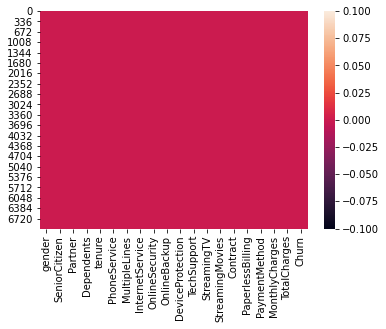

In [15]:
#Missing value checking using heatmap
sns.heatmap(df.isnull()) 

In [16]:
#Checking of duplicated values
df.duplicated().sum()

22

In [17]:
df.drop_duplicates(inplace=True)

Thus dropping the duplicated values

In [18]:
#lets check the unique values of all the columns using unique() function 
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Thus we see the number of unique and distinct value present in each category of column

In [19]:
for col in obj_col:
    print(col)
    print(df[col].value_counts())   
    print('\n')

gender
Male      3541
Female    3480
Name: gender, dtype: int64


Partner
No     3619
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


TechSupport
No                     3465
Yes                    2044
No internet servi

This gives the number of records in each category of column.We observe that there are 11 blank records in total chrages column.so 
we will first convert the blank spaces with nan values and then apply imputation technique.

In [20]:
#identifying the blank spaces 
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7021, dtype: object

In [22]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [23]:
df["TotalCharges"].dtype #object column converetd to numeric column

dtype('float64')

Now will impute the null values with mean imputaion technique

In [24]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

Converting the senior citizen whichis in numerical datatye to object datatype

In [25]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

# Revised Object and non_Object datatypes columns are

In [26]:
non_obj = df.select_dtypes(exclude ='object')
obj=df.select_dtypes(include='object')

In [27]:
non_obj.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [28]:
obj.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object')

# UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMN

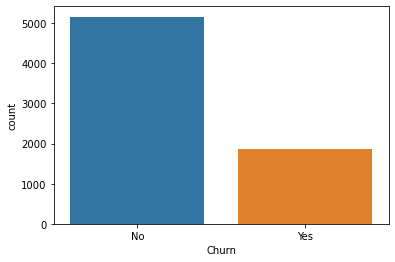

No     5164
Yes    1857
Name: Churn, dtype: int64


In [29]:
sns.countplot(x='Churn', data=obj)  #Plotting the Churn using countplot
plt.show()
print(df['Churn'].value_counts())

Thus we see customers leaving the services are on the higher side than the custometrs staying on the same services offered by telecom company
As churn is our target column,we see that the data is imbalance,we will apply smote technique to balance it later.

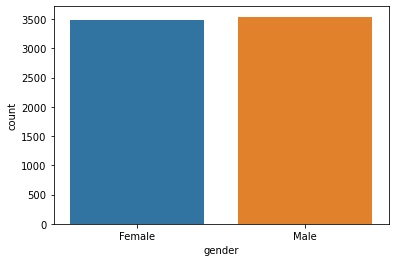

Male      3541
Female    3480
Name: gender, dtype: int64


In [30]:
sns.countplot(x='gender', data=obj)  #Plotting the gender using countplot
plt.show()
print(df['gender'].value_counts())

male and female are almost having equal records still male is slightly higher than female.

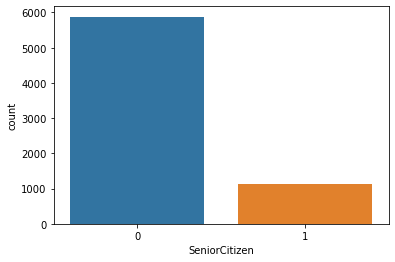

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


In [31]:
sns.countplot(x='SeniorCitizen', data=obj)  #Plotting the senior citizen using countplot
plt.show()
print(df['SeniorCitizen'].value_counts())

Those who are not senior citizen are very high in number and those who are senior citizen are low in number may senior citizens are not that much availing the services.

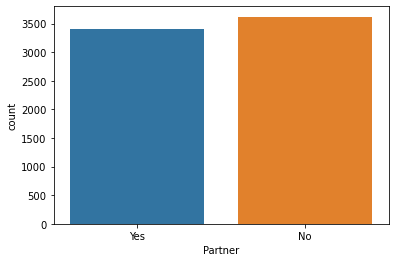

No     3619
Yes    3402
Name: Partner, dtype: int64


In [32]:
sns.countplot(x='Partner', data=obj)  #Plotting the partners using countplot
plt.show()
print(df['Partner'].value_counts())

The customers who are having partners and not having partners are almost equal.

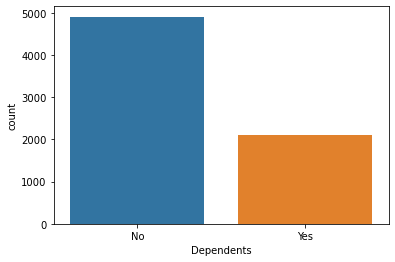

No     4911
Yes    2110
Name: Dependents, dtype: int64


In [33]:
sns.countplot(x='Dependents', data=obj)  #Plotting the dependents using countplot
plt.show()
print(df['Dependents'].value_counts())

Those customers are having dependents are less in number and those who are not having dependents are high in number.

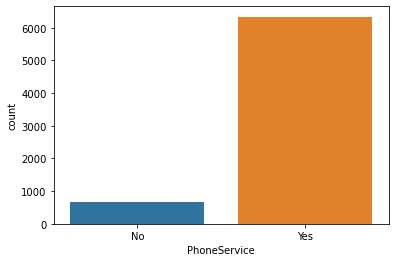

Yes    6339
No      682
Name: PhoneService, dtype: int64


In [34]:
sns.countplot(x='PhoneService', data=obj)  #Plotting the phoneservice using countplot
plt.show()
print(df['PhoneService'].value_counts())

The number of customers who are using phone services are high in number that is 6339 and those who are not using phone services are less
around 682.

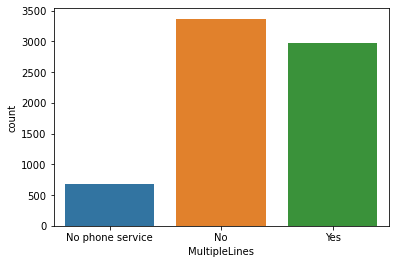

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [35]:
sns.countplot(x='MultipleLines', data=obj)  #Plotting the multiplelines using countplot
plt.show()
print(df['MultipleLines'].value_counts())

The customers who are using multiples line is 2971,those customers who are not having any phone service is around 682 and those not havung
any multiple lines are 3368 which are majority in number.

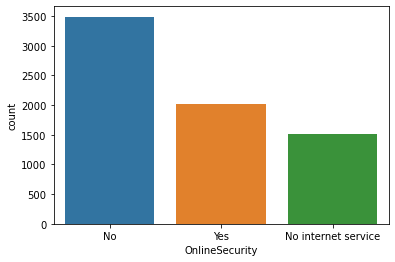

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


In [36]:
sns.countplot(x='OnlineSecurity', data=obj)  #Plotting the onlinesecurity using countplot
plt.show()
print(df['OnlineSecurity'].value_counts())

The customers having no online security is around 3490,those having online security is around 2019 and those not hvaing any internet
service is around 1512.

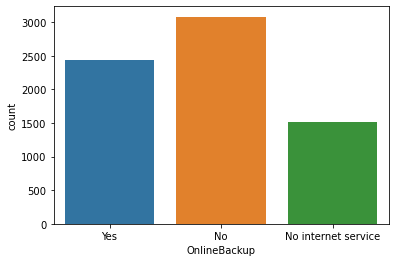

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


In [37]:
sns.countplot(x='OnlineBackup', data=obj)  #Plotting the onlinebackup using countplot
plt.show()
print(df['OnlineBackup'].value_counts())

Those customers who are not havoing online back up is 3080,having online back up is 2429 and those having no internet service is 
1512.

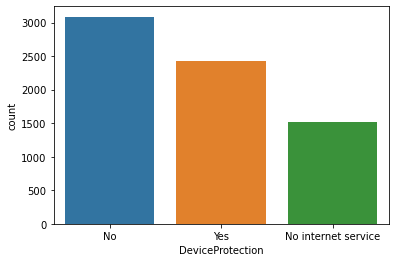

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


In [38]:
sns.countplot(x='DeviceProtection', data=obj)  #Plotting the deviceprotection using countplot
plt.show()
print(df['DeviceProtection'].value_counts())

Those customers having device protection is 2422,not having device protection is 3087 and those having no inetrnet service is 1512.

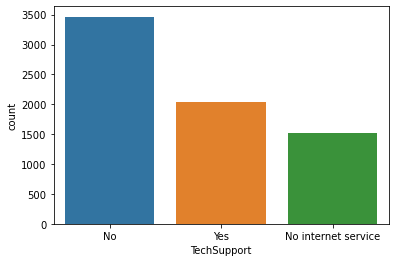

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


In [39]:
sns.countplot(x='TechSupport', data=obj)  #Plotting the techsupport using countplot
plt.show()
print(df['TechSupport'].value_counts())

Majority of the customers are not getting any tech suport that is 3465,those who are getting techsupport are around 2044 and those
having no internet service is 1512.

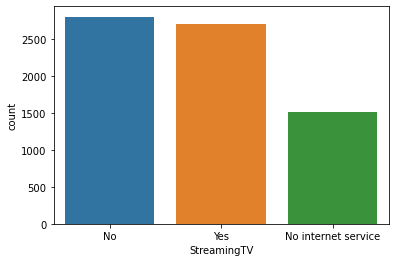

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


In [40]:
sns.countplot(x='StreamingTV', data=obj)  #Plotting the streamingtv using countplot
plt.show()
print(df['StreamingTV'].value_counts())

Those customers which are having streamingtv facility are 2702 ,those are not hvaing any streaming tv facility are 2802. 

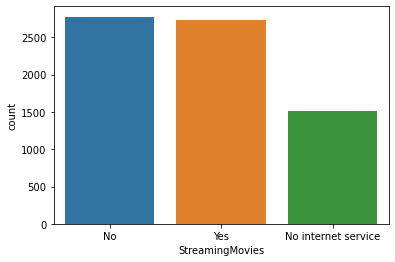

No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


In [41]:
sns.countplot(x='StreamingMovies', data=obj)  #Plotting the streamingmovies using countplot
plt.show()
print(df['StreamingMovies'].value_counts())

Those customers which are hving streamingmovies facility are 2732 and those who are not hvaing streaming moveies facility are 2777.

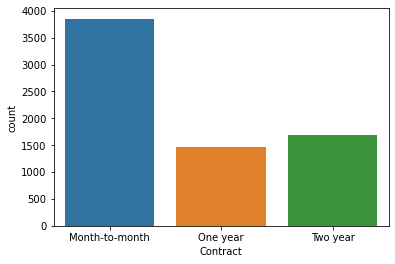

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [42]:
sns.countplot(x='Contract', data=obj)  #Plotting the Contract using countplot
plt.show()
print(df['Contract'].value_counts())

Majority of the customers are having contract for month-to-month that is 3835.Those who have contract for two year is 1695 and for one year it is 1473.

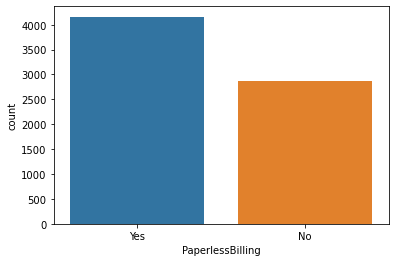

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


In [43]:
sns.countplot(x='PaperlessBilling', data=obj)  #Plotting the PaperlessBilling using countplot
plt.show()
print(df['PaperlessBilling'].value_counts())

Majority of the customers are having paperless billing. 

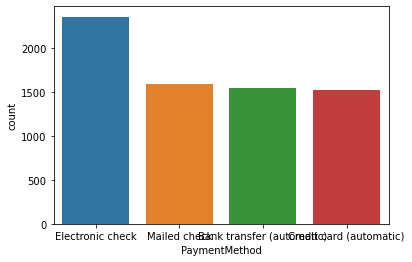

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [44]:
sns.countplot(x='PaymentMethod', data=obj)  #Plotting the PaperlessBilling using countplot
plt.show()
print(df['PaymentMethod'].value_counts())

Majority of the customers prefer to pay through electronic check that is 2359 and least is credit card that is 1522.

<AxesSubplot:xlabel='Churn', ylabel='count'>

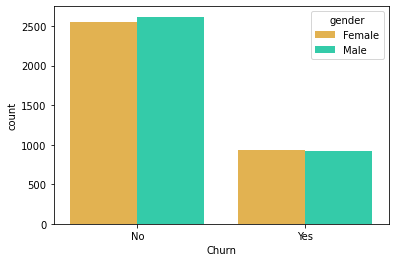

In [46]:
sns.countplot(x='Churn',data=df,hue='gender',palette="turbo_r")

Thus we see that gender is not contributing factor for customer churn as both the male and female ratios are almost same for churned or not churned.

<AxesSubplot:xlabel='Churn', ylabel='count'>

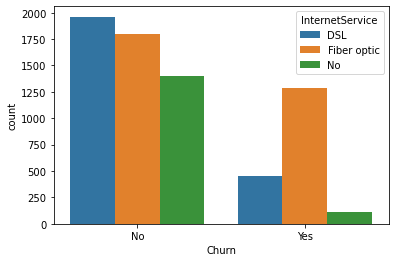

In [47]:
sns.countplot(x='Churn',data=df, hue='InternetService')

Thus we observe that there is no effect of internet services those who are not churned,means they are enjoying the services.
Those customers who are using fiber optic have high churn rate.this means company needs to look upon these and find out ways to improve
fiber optic services.

<AxesSubplot:xlabel='Churn', ylabel='count'>

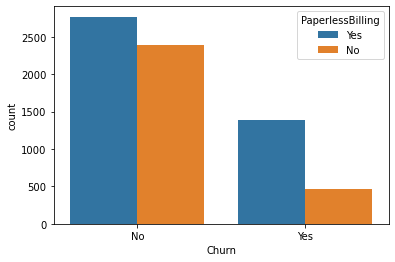

In [48]:
sns.countplot(x='Churn',data=df, hue='PaperlessBilling')

Thus we see that those customers who are using paperlessbiling having high churn rate,this may be because they may prefer tradional biling paper method.

<AxesSubplot:xlabel='Churn', ylabel='count'>

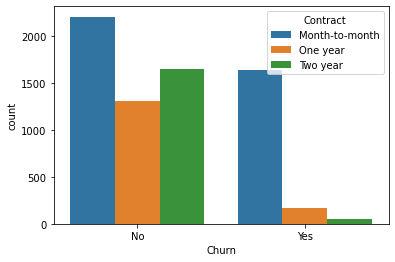

In [49]:
sns.countplot(x='Churn',data=df, hue='Contract')

Thus we observe that customers who are having contract for month-to-month are are having high churn rate may be due to
reason that they are not happy with the services.We need to retain this customers by giving favourable personalized services like one month free streamingtv or movies services,free 1 GB etc ,this defintly impact them and make them stay longer time.     

<AxesSubplot:xlabel='Churn', ylabel='count'>

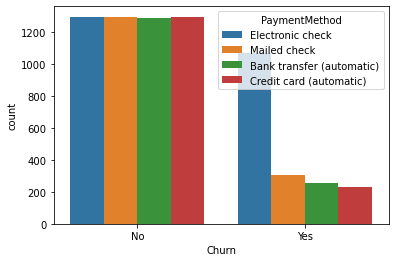

In [51]:
sns.countplot(x='Churn',data=df, hue='PaymentMethod')

Customers who are using electronic check are having high churn rate may be due to reason that there are still customers who
doesnt feel safe in transacting online may be due to cyber frauds  or may be due to slower processing timeetc.

<AxesSubplot:xlabel='Churn', ylabel='count'>

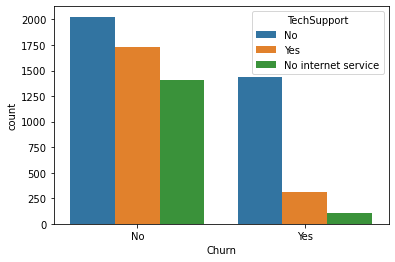

In [52]:
sns.countplot(x='Churn',data=df, hue='TechSupport')

Thus we see that tech suport provided by compoany is good .Those customers who are have tech support are churned more. 

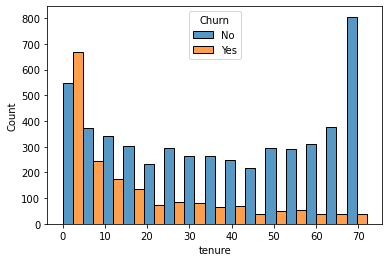

In [62]:
ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df,multiple='dodge')
#ax.set(xlabel="Tenure in Months", ylabel = "Count")

Thus we observe that for the initial months ,the churn rate was higher,this is the phase when the new customers takes the connection
and apply 'wait and watch policy' to check all the services provided by the telecom company is good or not,if they find it not satisfied,they 
leave the connection. 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

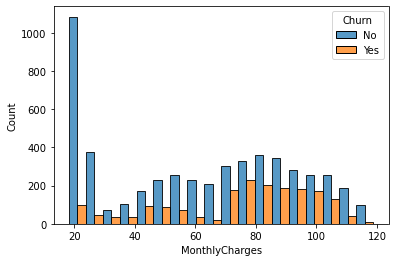

In [63]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')

Those who are paying monthly charges more ,they are not leaving the company may be due to the fact that company may be giving
some personalised services to retain them.

# Density plot of all the numerical features

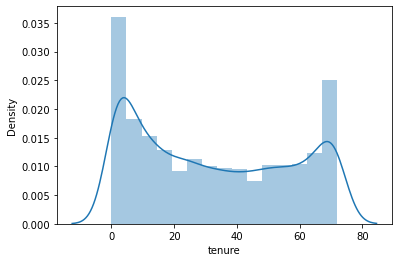

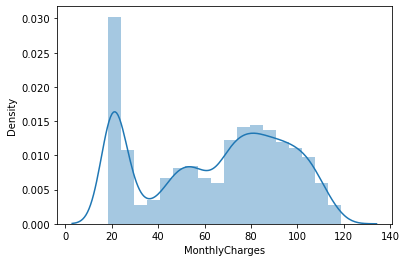

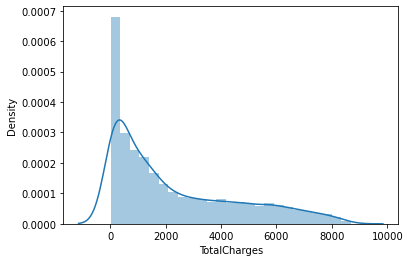

In [70]:
for feature in non_obj:
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

Thus we observe that the distribution is not normal.

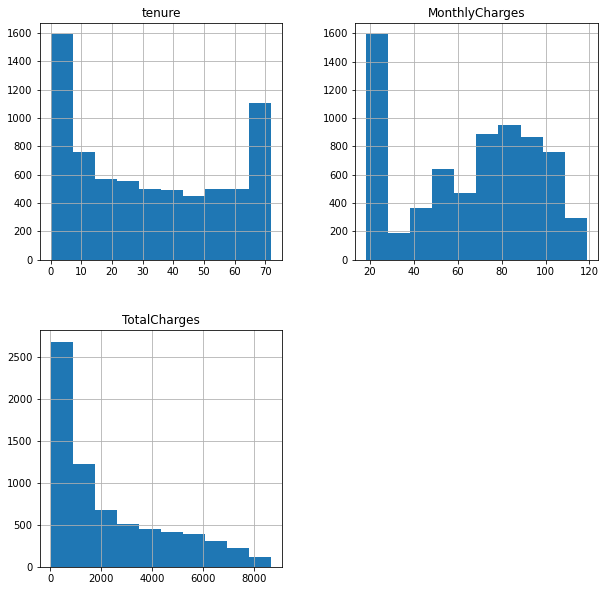

In [73]:
df.hist(figsize=(10, 10)); #using histogram to see the distribution of the column

Thus we observe that the distribution is not normal.

# Bivariate/Multivariate Analaysis

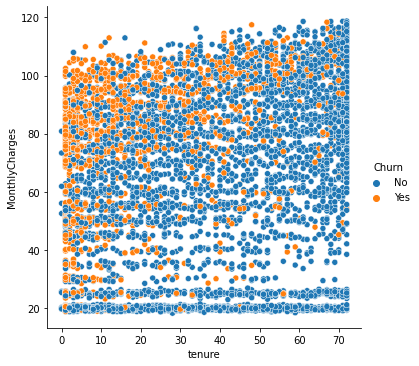

In [65]:
sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

Thus we see that in the initail months,if customers are not satisfied with the services provided by the telecom company ,they leave 
the connection.So we need to retain those customers by giving them personalises services or free one month connection etc or money back scheme.
If people are happy with the services provided,they keep contiuing the connection for longer period of time.

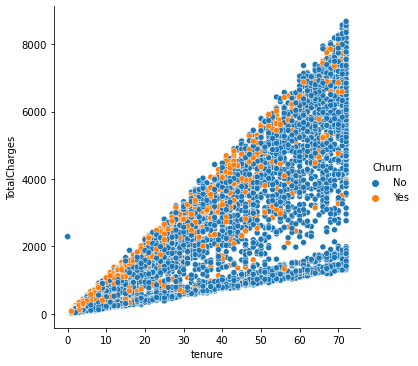

In [68]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

THus in this plot,total charges is directly proportional to tenure,if tenure increases then total charges also increases.
The customers are ready for high for longer period of time as they feel that services provided to them are good and satisfactory. 

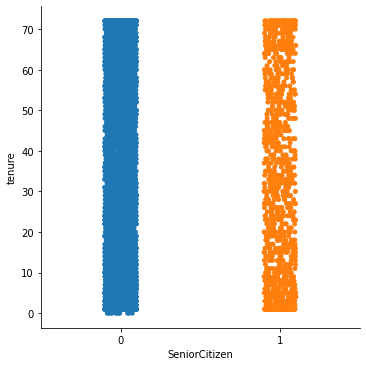

In [69]:
sns.catplot(x='SeniorCitizen',y="tenure",data=df)

Thus we see that senior citizen are subscribing to less number of days and those who are not senior citizen subscribes to larger
number of period.

# Outlier Detection

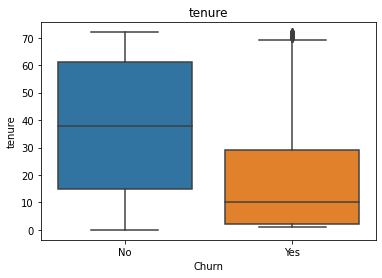

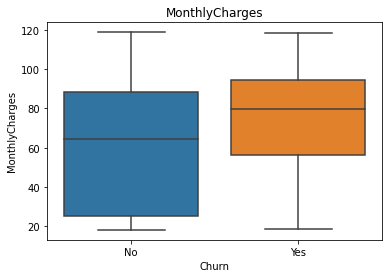

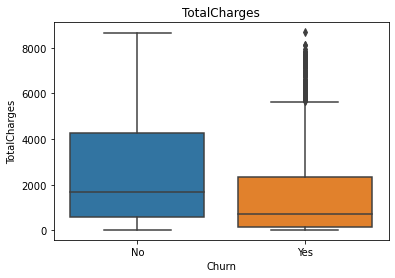

In [77]:
for feature in non_obj:
    sns.boxplot(x ='Churn', y = feature, data = df)
    plt.title(feature)
    plt.show()

Thus we see that outliers are present in the total charges having the churn rate.Total charges for the customers whco are leaving the
company are less than the charges who have paying more and at the same time,they are staying in the company may be due to fact 
that they are offered good services.

Outliers are also present in the tenure column ,we observe that new customers are leaving the company as they are not happy with the 
services thats why their tenure is less.

# Encoding the categorical object 

In [78]:
# Label Encoder
le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [82]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in obj:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
    

Thus with the help of ordinal encoder,i have encoded all the object column.

In [83]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0
7039,0.0,0.0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0
7040,0.0,0.0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0
7041,1.0,1.0,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


In [86]:
#Checking skewness
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

# Coorelation between target column vs Features

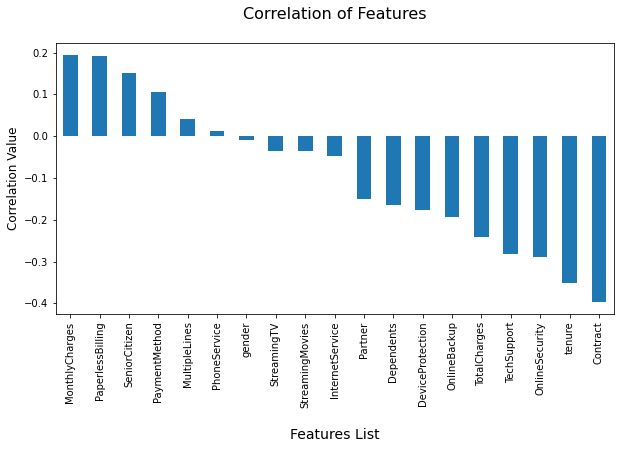

In [92]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Thus we see that target columns is depending on monthly charges.paperlessbiling,senior citizen,multiple lines.it is negatively correlated
with contracy,tenure,onlinesecurity

In [89]:
#apllying log transform methos:
for col in non_obj:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])    

In [93]:
#Removing outliers from Visibiltiy column
df=df[np.abs(df.TotalCharges-df.TotalCharges.mean())<=(3*df.TotalCharges.std())]

In [94]:
df=df[np.abs(df.tenure-df.tenure.mean())<=(3*df.tenure.std())]

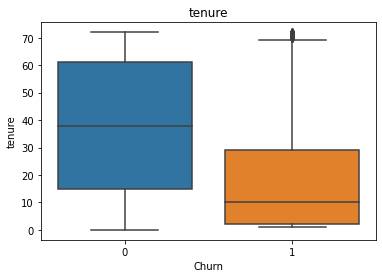

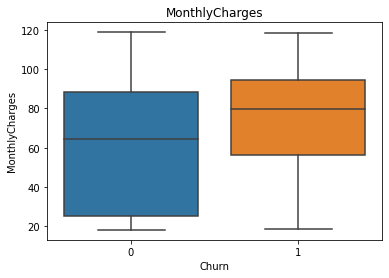

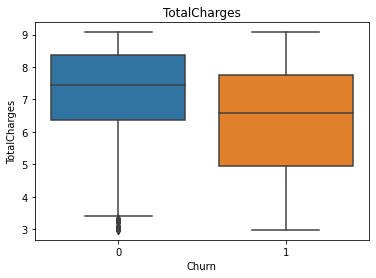

In [95]:
for feature in non_obj:
    sns.boxplot(x ='Churn', y = feature, data = df)
    plt.title(feature)
    plt.show()

Thus we see that outliers has been treated to an extent 

# Splitting the dataset into 2 variables into x and y as our feature and target column 

In [96]:
x = df.drop('Churn', axis=1)
y = df['Churn']

# Resolving the class imbalance in target column

In [98]:
#  samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [99]:
y.value_counts() #validating class imbalance issue

0    5164
1    5164
Name: Churn, dtype: int64

# Feature Scaling

In [100]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.044729,-0.518457,1.175727,-0.6047,-1.105573,-3.144958,0.030225,-1.273131,-0.779640,1.364234,-0.928431,-0.780100,-1.073629,-1.074946,-0.666054,0.761012,0.354522,-1.330372,-2.075499
1,1.041985,-0.518457,-0.916457,-0.6047,0.266581,0.322623,-1.035624,-1.273131,1.653833,-0.923584,1.359037,-0.780100,-1.073629,-1.074946,0.641550,-1.401856,1.369734,-0.386778,0.501237
2,1.041985,-0.518457,-0.916457,-0.6047,-1.063993,0.322623,-1.035624,-1.273131,1.653833,1.364234,-0.928431,-0.780100,-1.073629,-1.074946,-0.666054,0.761012,1.369734,-0.494717,-1.284353
3,1.041985,-0.518457,-0.916457,-0.6047,0.723966,-3.144958,0.030225,-1.273131,1.653833,-0.923584,1.359037,1.639902,-1.073629,-1.074946,0.641550,-1.401856,-1.675901,-0.896876,0.484879
4,-1.044729,-0.518457,-0.916457,-0.6047,-1.063993,0.322623,-1.035624,0.217658,-0.779640,-0.923584,-0.928431,-0.780100,-1.073629,-1.074946,-0.666054,0.761012,0.354522,0.091983,-1.074340


# Base model:Logistic Regression

In [104]:
#Importing train_test_split and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [105]:
lg = LogisticRegression()
from sklearn.model_selection import train_test_split

# Finding the best random state

In [106]:
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs well")
        print("At Random state:",i)
        print(f"At random state,the training accuracy  is:-", accuracy_score(y_train,pred_train)*100)
        print(f"At random state,the testing accuracy is:-", accuracy_score(y_test,pred_test)*100)   
        print("\n")

At Random State 39 The model performs well
At Random state: 39
At random state,the training accuracy  is:- 77.85039941902687
At random state,the testing accuracy is:- 77.87996127783155


At Random State 49 The model performs well
At Random state: 49
At random state,the training accuracy  is:- 77.92302106027597
At random state,the testing accuracy is:- 77.87996127783155


At Random State 72 The model performs well
At Random state: 72
At random state,the training accuracy  is:- 77.69305252965384
At random state,the testing accuracy is:- 77.73475314617619


At Random State 125 The model performs well
At Random state: 125
At random state,the training accuracy  is:- 78.03195352214959
At random state,the testing accuracy is:- 77.97676669893514


At Random State 129 The model performs well
At Random state: 129
At random state,the training accuracy  is:- 77.74146695715322
At random state,the testing accuracy is:- 77.68635043562439


At Random State 154 The model performs well
At Random state: 

Thus we see that At Random State 39 The model performs well ,the training accuracy  is:- 77.85 and the testing accuracy is:- 77.87 which is very close to each other

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=39)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[473 586]
 [434 573]]
              precision    recall  f1-score   support

           0       0.52      0.45      0.48      1059
           1       0.49      0.57      0.53      1007

    accuracy                           0.51      2066
   macro avg       0.51      0.51      0.51      2066
weighted avg       0.51      0.51      0.50      2066



The accuracy of the model is 51% which is less.

# Cross validation score for logistic regression

In [109]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
css=accuracy_score(y_test,pred_lg)

In [110]:
for j in range(2,15):
    css_score=cross_val_score(lg,x,y,cv=j)
    csc=css_score.mean()
    print("At cv:-",j)
    print("cross validation score is :-",csc*100)
    print("accuracy score is :-",css*100)
    print('\n')

At cv:- 2
cross validation score is :- 77.92408985282727
accuracy score is :- 78.02516940948692


At cv:- 3
cross validation score is :- 77.8467529269036
accuracy score is :- 78.02516940948692


At cv:- 4
cross validation score is :- 77.92408985282727
accuracy score is :- 78.02516940948692


At cv:- 5
cross validation score is :- 77.73061840615617
accuracy score is :- 78.02516940948692


At cv:- 6
cross validation score is :- 77.80815226181646
accuracy score is :- 78.02516940948692


At cv:- 7
cross validation score is :- 77.74023766872051
accuracy score is :- 78.02516940948692


At cv:- 8
cross validation score is :- 77.67234701781564
accuracy score is :- 78.02516940948692


At cv:- 9
cross validation score is :- 77.7598043136989
accuracy score is :- 78.02516940948692


At cv:- 10
cross validation score is :- 77.68216679048756
accuracy score is :- 78.02516940948692


At cv:- 11
cross validation score is :- 77.70147850020055
accuracy score is :- 78.02516940948692


At cv:- 12
cross val

Thus cross validation score and accuracy score are very near to each other at different cv state,so we will take cv=5. 

In [111]:
csc_selected=cross_val_score(lg,x,y,cv=5).mean()
print("The  cv score is :-",csc_selected *100,"\n The accuracy score is ",css*100)

The  cv score is :- 77.73061840615617 
 The accuracy score is  78.02516940948692


Thus the accuracy score has improved to 78% from 51% whereas after cross validation,the final accuracy score is 77.73% 
as it has reduced the overfitting problem.

# modelling-Other models

In [113]:

#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=39)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[842 217]
 [195 812]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1059
           1       0.79      0.81      0.80      1007

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



The accuracy score for DecisionTreeClassifier is 80% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=842,It states that 842 positive class data points were correctly classified by the model.

True Negative(TN)=812,It states that 812 negative class data points were correctly classified by the model.

False Positive(FP)=217,It states that 217 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=195 ,It states that 195 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [115]:
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=39)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[928 131]
 [153 854]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1059
           1       0.87      0.85      0.86      1007

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



The accuracy score for RandomForestClassifier is 86% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=928,It states that 928 positive class data points were correctly classified by the model.

True Negative(TN)=854,It states that 854 negative class data points were correctly classified by the model.

False Positive(FP)=131,It states that 131 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=153 ,It states that 153 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [116]:
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=39)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[881 178]
 [150 857]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1059
           1       0.83      0.85      0.84      1007

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



The accuracy score for AdaBoostClassifier is 84% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=881,It states that 881 positive class data points were correctly classified by the model.

True Negative(TN)=857,It states that 857 negative class data points were correctly classified by the model.

False Positive(FP)=178,It states that 178 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=150 ,It states that 150 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [117]:
#Model 4-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model4=GradientBoostingClassifier(random_state=39)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[894 165]
 [148 859]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1059
           1       0.84      0.85      0.85      1007

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



The accuracy score for GradientBoostingClassifier is 85% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=894,It states that 894 positive class data points were correctly classified by the model.

True Negative(TN)=859,It states that 859 negative class data points were correctly classified by the model.

False Positive(FP)=165,It states that 165 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=148 ,It states that 148 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [118]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=39)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[859 200]
 [151 856]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1059
           1       0.81      0.85      0.83      1007

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



The accuracy score for SupportVectorClassifier is 83% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=859,It states that 859 positive class data points were correctly classified by the model.

True Negative(TN)=856,It states that 856 negative class data points were correctly classified by the model.

False Positive(FP)=200,It states that 200 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=151 ,It states that 151 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

Thus we see,as per the accuracy score as evaluation matrix,

The accuracy score of Decision tree classifier is 80% .

The accuracy score of Random Forest Classifier is 86%.

The accuracy score of AdaBoost is 84%.

The accuracy score of Gradient Boosting is 85%.

The accuracy score of Support vector machine (SVM) is 83%.

The base model(logistic regression) accuracy score is 51%.,fter applying cv ,score improves to 77%.

Conclusion: We see that Random Forest Classifier,SVM Classifier,ADaBoost, Gradient Boosting classifier are producing good accuracy.

Now we will check cross validation technque for overfitting for these selected models based on accuracy score as the evaluation matrix.

# CROSS VALIDATION For the models

In [119]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.7773061840615617


In [120]:
scr=cross_val_score(model1,x,y,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.7991032020795586


In [121]:
scr=cross_val_score(model2,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.8478075330087733


In [122]:
scr=cross_val_score(model3,x,y,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.8270839066261318


In [123]:
cr=cross_val_score(model4,x,y,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.8270839066261318


In [124]:
scr=cross_val_score(model5,x,y,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.8182706285789292


Thus we see that after doing cross validation ,we can see the scores that Cross validation score of all the models have been reduced which means that cross validation is not decreasing the accuracy, it is rather giving us a better approximation for that accuracy, including less overfitting.So as per the avobe models:

Cross validation score :

Logistic Regression:77%

DEsicion Tree:79.9%

RandomForest:84.8%

AdaBoost:82.7%

GradientBoosting:82.7%

SVM:81.8%

So I am taking Random Forest Classifier for hyperparameter tuning under GridSearch as from the confusion 
matrix also we can see less error are detected by randomforest model compare to others problem

# HYper parameter tuning

In [125]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [126]:
GCV = GridSearchCV(model2,parameters, cv= 5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_ #printing the best parameter found by gridsearch cv
#{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [127]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best paramter
accuracy_score(y_test,GCV_pred) #checking final accuracy

0.8426911907066795

Thus after cross validation and then doing hypertuning with best parametrs the accuracy score
is 84.26% which is very good and this is our best fit model.

# AUC_ROC PLOT

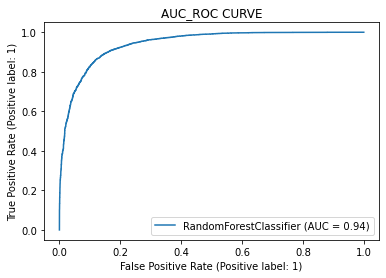

In [129]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x,y)
plt.title("AUC_ROC CURVE")
plt.show()

OBSERVATION: So final accuracy is 92 % and and our AUC score is 94% here we can see our AUC (c-value) is far greater than 0.5 ,it is 1 which can be considered very good which means that the classifier is able to disntinguish between o and 1. So it can distinguish which employees are going to leave and who are going to stay.We can defintly employ this model.

# MODEL SAVING

In [130]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='customer_churn.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

# CONCLUSION:

In [131]:
loaded_model=pickle.load(open('customer_churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #getting 84 score

84.26911907066795


In [132]:
#testing the predicted result with original dataset
import numpy as np 
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":predicted},index=range(len(a)))
df_com

,original,Predicted
0,1,1
1,1,1
2,0,1
3,1,0
4,1,0
...,...,...
2061,0,0
2062,1,1
2063,0,0
2064,0,1
